# Virat kohli ODI analysis


Virat Kohli (India)

Full Name: Virat Kohli Born: 05/11/1988 Current Age: 31 years 341 days Bats: Right Handed Bowls: Right Arm Medium

Virat Kohli is an Indian cricketer and the current captain of the India national team. A right-handed top-order batsman, Kohli is regarded as one of the best batsmen in the world. He plays for Royal Challengers Bangalore in the Indian Premier League, and has been the team's captain since 2013.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

Data set has been downloaded from kaggle.com

In [60]:
virat_odi=pd.read_csv('Virat_Kohli_ODI.csv')

In [61]:
virat_odi.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


### Data Sechema


Column Name	         Description

0	Runs	         The number of runs scored by Virat in that particular match. Ifnot out, then it has been marked by an                          asterisk (*)
1	Mins	         Total time taken by Virat to score the runs. Essentially the time for which Virat batted in that match.
2	BF	             Total number of balls faced by Virat to score the runs in that match.
3	4s	             Number of fours hit by Virat in that match
4	6s	             Number of sixes hit by Virat in that match
5	SR	            The strike rate of Virat in that match.
6	Pos	            The batting position of Virat in that match.
7	Dismissal	    The mode of dismissal in that match.
8	Inns	        Denotes whether team batted first or batted second
9	Opposition	    The opposition country against which Virat played.
10	Ground	        The ground where the match was played.
11	Start Date	    The date when the match was played.

In [62]:
virat_odi.shape

(132, 12)

In [63]:
virat_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


### Data Preprocessing

In [64]:
virat_odi.isnull().sum()

Runs          0
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [65]:
virat_odi['Mins'].unique()

array(['33', '82', '40', '87', '45', '6', '53', '32', '20', '93', '-',
       '136', '128', '3', '28', '13', '57', '5', '98', '193', '162', '78',
       '83', '10', '122', '43', '51', '126', '11', '113', '16', '2', '38',
       '69', '118', '1', '68', '135', '9', '18', '102', '70', '134', '42',
       '154', '21', '15', '99', '30', '41', '44', '36', '158', '80',
       '187', '12', '25', '86', '110', '66', '19', '120', '133', '35',
       '121', '104', '4', '159', '7', '179', '88', '14', '129', '157',
       '67', '124', '164', '34', '109', '192', '24', '55', '29', '155',
       '202', '148', '84', '174', '131', '64', '152', '147', '81'],
      dtype=object)

In [66]:
virat_odi['Mins']=='-'

0      False
1      False
2      False
3      False
4      False
       ...  
127    False
128    False
129    False
130    False
131    False
Name: Mins, Length: 132, dtype: bool

In [67]:
virat_odi[virat_odi['Mins']=='-']

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
10,107,-,114,11,1,93.85,4,caught,2,v Sri Lanka,Kolkata,24-Dec-09
13,31,-,46,1,0,67.39,5,caught,1,v South Africa,Jaipur,21-Feb-10
14,57,-,71,4,1,80.28,3,caught,2,v South Africa,Ahmedabad,27-Feb-10
51,86*,-,99,11,0,86.86,4,not out,2,v England,Mumbai,23-Oct-11
105,49,-,44,2,2,111.36,4,caught,2,v Sri Lanka,Ahmedabad,6-Nov-14
106,53,-,61,4,1,86.88,4,caught,2,v Sri Lanka,Hyderabad (Deccan),9-Nov-14


In [68]:
virat_odi[virat_odi['Mins']=='-'].shape

(6, 12)

In [69]:
temp_df=virat_odi[virat_odi['Mins']!='-']
temp_df['Mins']=temp_df['Mins'].astype(int)

C:\Users\UMMER\AppData\Local\Temp\ipykernel_95440\2879029507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Mins']=temp_df['Mins'].astype(int)


In [70]:
temp_df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17
130,8,6,5,2,0,160,3,caught,1,v England,Cuttack,19-Jan-17


In [71]:
temp_arr=temp_df.agg({'Mins':'sum','BF':'sum'}).values

In [72]:
temp_arr

array([8882, 6280], dtype=int64)

In [73]:
avg_min_per_ball=temp_arr[1]/temp_arr[0]
avg_min_per_ball

0.7070479621706823

In [74]:
#imputing process
virat_odi['Mins']=virat_odi[['Mins','BF']].apply (lambda x: int (x[1]*avg_min_per_ball) if x[0]=='-' else int(x[0]), axis=1)

In [33]:
virat_odi.head(15)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
5,2*,6,2,0,0,100,7,not out,1,v Sri Lanka,Colombo (RPS),14-Sep-09
6,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,25-Oct-09
7,10,32,16,1,0,62.5,3,caught,2,v Australia,Mohali,2-Nov-09
8,27,20,19,4,0,142.1,7,bowled,1,v Sri Lanka,Rajkot,15-Dec-09
9,54,93,65,7,0,83.07,4,lbw,1,v Sri Lanka,Nagpur,18-Dec-09


In [75]:
virat_odi['Mins'].unique()

array([ 33,  82,  40,  87,  45,   6,  53,  32,  20,  93,  80, 136, 128,
        50,   3,  28,  13,  57,   5,  98, 193, 162,  78,  83,  10, 122,
        43,  51, 126,  11, 113,  16,   2,  38,  69, 118,   1,  68, 135,
         9,  18, 102,  70, 134,  42, 154,  21,  15,  99,  30,  41,  44,
        36, 158, 187,  12,  25,  86, 110,  66,  19, 120, 133,  35, 121,
       104,   4, 159,   7, 179,  88,  14, 129, 157,  67, 124, 164,  34,
        31, 109, 192,  24,  55,  29, 155, 202, 148,  84, 174, 131,  64,
       152, 147,  81], dtype=int64)

In [76]:
#creating a boolean feature called notout
virat_odi['Not out']=virat_odi['Runs'].apply (lambda x: 'yes' if '*' in x else 'no')

In [77]:
virat_odi.head(10)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not out
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08,no
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08,no
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08,no
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08,no
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08,no
5,2*,6,2,0,0,100,7,not out,1,v Sri Lanka,Colombo (RPS),14-Sep-09,yes
6,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,25-Oct-09,no
7,10,32,16,1,0,62.5,3,caught,2,v Australia,Mohali,2-Nov-09,no
8,27,20,19,4,0,142.1,7,bowled,1,v Sri Lanka,Rajkot,15-Dec-09,no
9,54,93,65,7,0,83.07,4,lbw,1,v Sri Lanka,Nagpur,18-Dec-09,no


In [78]:
virat_odi['Not out'].value_counts()

no     115
yes     17
Name: Not out, dtype: int64

In [79]:
virat_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    int64 
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
 12  Not out     132 non-null    object
dtypes: int64(6), object(7)
memory usage: 13.5+ KB


In [80]:
#convering data type Runs
virat_odi['Runs']=virat_odi['Runs'].apply (lambda x: int(x[:-1]) if '*' in x else int(x) )

In [81]:
virat_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    int64 
 1   Mins        132 non-null    int64 
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
 12  Not out     132 non-null    object
dtypes: int64(7), object(6)
memory usage: 13.5+ KB


In [82]:
#converting Start Date column into datetime datatype
virat_odi['Start Date']=pd.to_datetime(virat_odi['Start Date'])

In [83]:
virat_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        132 non-null    int64         
 1   Mins        132 non-null    int64         
 2   BF          132 non-null    int64         
 3   4s          132 non-null    int64         
 4   6s          132 non-null    int64         
 5   SR          132 non-null    object        
 6   Pos         132 non-null    int64         
 7   Dismissal   132 non-null    object        
 8   Inns        132 non-null    int64         
 9   Opposition  132 non-null    object        
 10  Ground      132 non-null    object        
 11  Start Date  132 non-null    datetime64[ns]
 12  Not out     132 non-null    object        
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 13.5+ KB


In [84]:
#creating Quarter feature
virat_odi['Quarter']=virat_odi['Start Date'].dt.quarter

In [85]:
#creating year feature
virat_odi['year']=virat_odi['Start Date'].dt.year

In [86]:
virat_odi.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not out,Quarter,year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,no,3,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,no,3,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,no,3,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,no,3,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,no,3,2008


In [87]:
virat_odi['SR'].unique()

array(['54.54', '55.22', '65.78', '81.81', '67.39', '100', '73.17',
       '62.5', '142.1', '83.07', '93.85', '89.21', '107.36', '80.28', '-',
       '62.06', '71.42', '82.35', '0', '64.91', '97.52', '100.96',
       '87.67', '90', '25', '77.14', '64.7', '68.29', '94.56', '33.33',
       '120.48', '64.15', '60', '77.63', '72.72', '42.85', '78.64',
       '66.66', '90.38', '38.88', '115.05', '58.73', '114.28', '116.66',
       '86.86', '50', '95.12', '209.09', '94.11', '91.17', '64.28', '48',
       '77.77', '80.48', '93.8', '20', '58.46', '107.56', '65.71',
       '41.17', '68.18', '68.51', '97.46', '78.78', '126.47', '52.38',
       '122.89', '106.48', '77.27', '71.76', '192.3', '93.15', '174.24',
       '102.38', '99', '105.55', '88.57', '110.81', '120', '105.12',
       '111.47', '80', '61.9', '40', '79.48', '111.4', '104.76', '111.36',
       '86.88', '103.12', '110.31', '56.25', '7.69', '85.18', '61.11',
       '98.57', '93.81', '88.05', '115.21', '104.93', '69.23', '114.92',
    

In [88]:
virat_odi[virat_odi['SR']=='-']

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not out,Quarter,year
15,0,3,0,0,0,-,3,run out,1,v Zimbabwe,Bulawayo,2010-05-28,no,2,2010


In [89]:
virat_odi[virat_odi['SR']=='-']=0

In [90]:
virat_odi[virat_odi['SR']=='-']

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not out,Quarter,year


In [91]:
virat_odi['SR']=virat_odi['SR'].astype(float)

In [92]:
virat_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   Mins        132 non-null    int64  
 2   BF          132 non-null    int64  
 3   4s          132 non-null    int64  
 4   6s          132 non-null    int64  
 5   SR          132 non-null    float64
 6   Pos         132 non-null    int64  
 7   Dismissal   132 non-null    object 
 8   Inns        132 non-null    int64  
 9   Opposition  132 non-null    object 
 10  Ground      132 non-null    object 
 11  Start Date  132 non-null    object 
 12  Not out     132 non-null    object 
 13  Quarter     132 non-null    int64  
 14  year        132 non-null    int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 15.6+ KB


In [96]:
virat_odi[virat_odi['year']==0]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not out,Quarter,year
15,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0


In [98]:
virat_odi=virat_odi[virat_odi['year']!=0]

In [99]:
virat_odi[virat_odi['year']==0]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not out,Quarter,year


In [100]:
virat_odi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 131
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        131 non-null    int64  
 1   Mins        131 non-null    int64  
 2   BF          131 non-null    int64  
 3   4s          131 non-null    int64  
 4   6s          131 non-null    int64  
 5   SR          131 non-null    float64
 6   Pos         131 non-null    int64  
 7   Dismissal   131 non-null    object 
 8   Inns        131 non-null    int64  
 9   Opposition  131 non-null    object 
 10  Ground      131 non-null    object 
 11  Start Date  131 non-null    object 
 12  Not out     131 non-null    object 
 13  Quarter     131 non-null    int64  
 14  year        131 non-null    int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 16.4+ KB


In [101]:
virat_odi['Start Date']=pd.to_datetime(virat_odi['Start Date'])

C:\Users\UMMER\AppData\Local\Temp\ipykernel_95440\1131749812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virat_odi['Start Date']=pd.to_datetime(virat_odi['Start Date'])


In [102]:
virat_odi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 131
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        131 non-null    int64         
 1   Mins        131 non-null    int64         
 2   BF          131 non-null    int64         
 3   4s          131 non-null    int64         
 4   6s          131 non-null    int64         
 5   SR          131 non-null    float64       
 6   Pos         131 non-null    int64         
 7   Dismissal   131 non-null    object        
 8   Inns        131 non-null    int64         
 9   Opposition  131 non-null    object        
 10  Ground      131 non-null    object        
 11  Start Date  131 non-null    datetime64[ns]
 12  Not out     131 non-null    object        
 13  Quarter     131 non-null    int64         
 14  year        131 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(4)
memory usage: 16.4+ 

## Getting insights

In [104]:
virat_odi.groupby('Opposition').agg({'Runs':'sum','Opposition':'count'})

,Runs,Opposition
Opposition,,
v Australia,999,20
v Bangladesh,544,8
v England,830,21
v Ireland,34,1
v Netherlands,12,1
v New Zealand,877,14
v Pakistan,22,4
v South Africa,558,15
v Sri Lanka,1084,24


In [105]:
virat_odi['Opposition'].unique()

array(['v Sri Lanka', 'v Australia', 'v Bangladesh', 'v South Africa',
       'v Zimbabwe', 'v New Zealand', 'v Ireland', 'v Netherlands',
       'v West Indies', 'v Pakistan', 'v England'], dtype=object)

In [106]:
virat_odi[virat_odi.Opposition=='v Australia']

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not out,Quarter,year
6,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,2009-10-25,no,4,2009
7,10,32,16,1,0,62.50,3,caught,2,v Australia,Mohali,2009-11-02,no,4,2009
21,118,193,121,11,1,97.52,3,caught,2,v Australia,Visakhapatnam,2010-10-20,no,4,2010
37,24,38,33,1,0,72.72,4,caught,2,v Australia,Ahmedabad,2011-03-24,no,1,2011
58,31,30,34,3,0,91.17,3,caught,2,v Australia,Melbourne,2012-02-05,no,1,2012
59,18,41,28,1,0,64.28,3,caught,2,v Australia,Adelaide,2012-02-12,no,1,2012
60,12,44,25,0,0,48.00,3,caught,2,v Australia,Brisbane,2012-02-19,no,1,2012
61,21,36,27,2,0,77.77,4,caught,2,v Australia,Sydney,2012-02-26,no,1,2012
82,61,121,85,6,0,71.76,3,lbw,2,v Australia,Pune,2013-10-13,no,4,2013
83,100,82,52,8,7,192.30,3,not out,2,v Australia,Jaipur,2013-10-16,yes,4,2013


In [107]:
dict1={}
for i in virat_odi.index:
    runs=virat_odi.loc[i].Runs
    country=virat_odi.loc[i].Opposition
    if country not in dict1:
        dict1[country]=[runs,1]
    else:
        dict1[country]=[dict1[country][0]+runs,dict1[country][1]+1]

In [108]:
dict1

{'v Sri Lanka': [1084, 24],
 'v Australia': [999, 20],
 'v Bangladesh': [544, 8],
 'v South Africa': [558, 15],
 'v Zimbabwe': [215, 4],
 'v New Zealand': [877, 14],
 'v Ireland': [34, 1],
 'v Netherlands': [12, 1],
 'v West Indies': [1009, 19],
 'v Pakistan': [22, 4],
 'v England': [830, 21]}

In [110]:
dict1.items()

dict_items([('v Sri Lanka', [1084, 24]), ('v Australia', [999, 20]), ('v Bangladesh', [544, 8]), ('v South Africa', [558, 15]), ('v Zimbabwe', [215, 4]), ('v New Zealand', [877, 14]), ('v Ireland', [34, 1]), ('v Netherlands', [12, 1]), ('v West Indies', [1009, 19]), ('v Pakistan', [22, 4]), ('v England', [830, 21])])

In [112]:
maxx=0
team=''
for country, value in dict1.items():
    avg=value[0]/value[1]
    if avg>maxx:
        maxx=avg
        team=country
maxx,team

(68.0, 'v Bangladesh')

2:plotting a histogram

<function matplotlib.pyplot.show(close=None, block=None)>

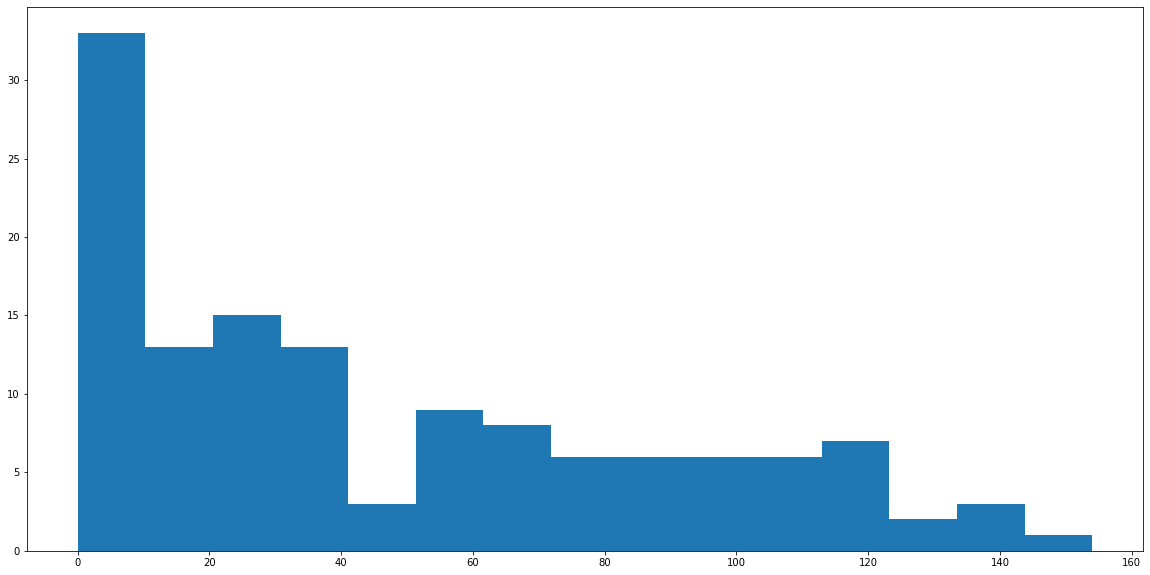

In [113]:
runs=virat_odi['Runs']
plt.figure(figsize=(20,10))
plt.hist(runs,bins=15)
plt.show

3:90-100(100 excluded) virat avg SR?

In [115]:
avg_list=[]
for i in virat_odi.index:
    row=virat_odi.loc[i]
    runs=row['Runs']
    if runs>=90 and runs<100:
        avg_list.append(float(row['SR']))
avg_sr=sum(avg_list)/len(avg_list)
avg_sr    
  

93.1

4:find the range that have virat max sixes and fours?

In [117]:
runs=virat_odi['Runs']
group_bin=[i//10 for i in runs]
virat_odi['Group_size']=group_bin
df1=virat_odi.groupby('Group_size').sum().reset_index()
df1.head()


C:\Users\UMMER\AppData\Local\Temp\ipykernel_95440\3942568470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virat_odi['Group_size']=group_bin


,Group_size,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Quarter,year
0,0,99,293,226,6,1,1177.10,105,47,78,62392
1,1,187,403,290,15,1,916.35,45,22,35,28168
2,2,359,621,451,39,1,1321.97,54,21,35,30174
3,3,444,810,640,41,2,945.75,43,23,34,26139
4,4,177,228,179,10,5,406.06,13,7,13,8057


In [119]:
max_six=0
for i in df1.index:
    row=(df1.iloc[i])
    six_run=row['6s']
    if max_six < six_run:
        max_six=six_run
        max_four=row['4s']
        group_int=row['Group_size']

max_six,max_four,group_int

(14.0, 90.0, 10.0)